In [1]:
from astropy.io import fits
from astropy.utils.data import download_file
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import make_lupton_rgb
from matplotlib.colors import LogNorm

For more data $\href{http://www.mistisoftware.com/astronomy}{here}$

In [2]:
image_file = download_file('http://www.mistisoftware.com/astronomy/fits/ngc7023_041014_17i85m_L.FIT', cache=True )

In [3]:
ngc7023 = fits.open(image_file)

In [4]:
ngc7023.info()

Filename: C:\Users\Jamal\.astropy\cache\download\url\1039171eeb6ed9fc980939cbf6276097\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (4008, 2672)   int16 (rescales to uint16)   


In [5]:
ngc7023[0].header

 [astropy.io.fits.verify]


SIMPLE  =                    T/CCDSOFT-SOFTWARE BISQUE 2                        
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 4008                                                  
NAXIS2  =                 2672                                                  
BSCALE  = +1.000000000000E+000                                                  
BZERO   = +3.276800000000E+004                                                  
BIAS    =                  100                                                  
FOCALLEN= +0.000000000000E+000                                                  
APTAREA = +0.000000000000E+000                                                  
APTDIA  = +0.000000000000E+000                                                  
DATE-OBS= '2004-10-15T05:06:29.560'                                             
TIME-OBS= '05:06:29.560     

In [6]:
data = ngc7023[0].data

In [7]:
data.shape

(2672, 4008)

In [8]:
data.dtype.name

'uint16'

In [9]:
print(data)

[[   0    0    0 ...    0    0    0]
 [2302 2258 2260 ...  983  884    0]
 [5768 5722 5709 ... 3945 2318    0]
 ...
 [5914 7753 7658 ... 1893 1378    0]
 [5360 7099 7057 ... 1027  660    0]
 [1846 3564 3436 ...    0    0    0]]


$\textbf{Viewing the image data}$

It's 2D array so we will use **plt.imshow()**

For more information about **plt.imshow()** $\href{https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html}{here}$


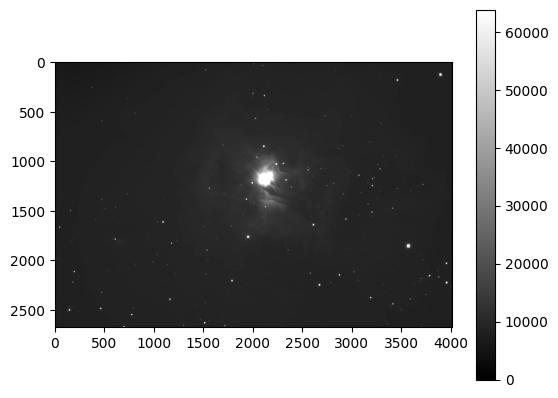

In [10]:
plt.imshow(data, cmap='gray')
plt.colorbar()

$\textbf{Plotting a histogram}$

the histogram will help us to identify the number of the brightness values for each and every pixels first of all we need to flatten this array ( we need to cast the data from a 2D to array to something 1D the iterable python object ***data.flat*** ).

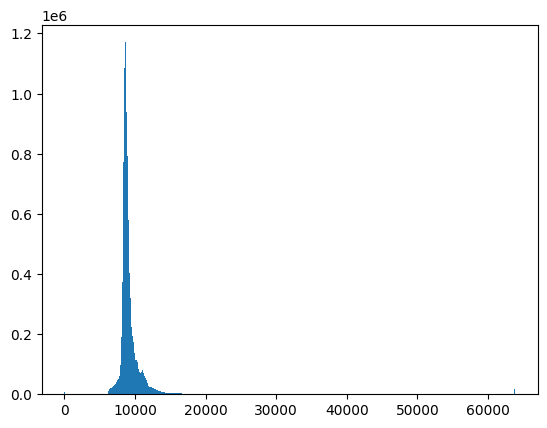

In [11]:
histogram = plt.hist(data.flat, bins=500)

$\textbf{Displaying the image with a logarithmic scale}$

We want to use a logarithmic color scale. To do so we need to load the **LogNorm** object from matplotlib.

[Text(1, 4000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

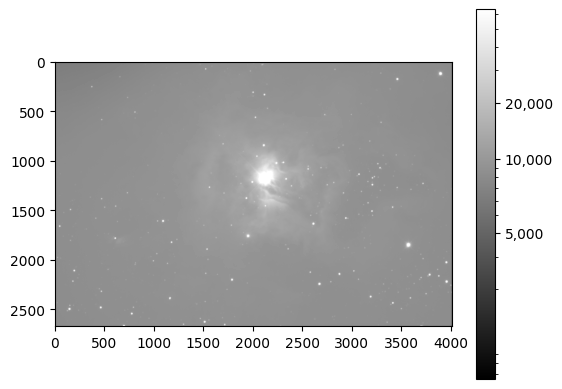

In [12]:
plt.imshow(data, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[4.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

$\textbf{RGB filters}$

In [13]:
r_filter= download_file('http://www.mistisoftware.com/astronomy/fits/ngc7023_041014_5i25m_R.FIT', cache=True )
g_filter= download_file('http://www.mistisoftware.com/astronomy/fits/ngc7023_041014_5i25m_G.FIT', cache=True )
b_filter= download_file('http://www.mistisoftware.com/astronomy/fits/ngc7023_041014_5i25m_B.FIT', cache=True )

In [14]:
ngc7023_r=fits.open(r_filter)
ngc7023_g=fits.open(g_filter)
ngc7023_b=fits.open(b_filter)

In [24]:
r_data = ngc7023_r[0].data
print(r_data.dtype.name)
print("---------------------------------------------")
g_data = ngc7023_g[0].data
print(g_data.dtype.name)
print("---------------------------------------------")
b_data = ngc7023_b[0].data
print(b_data.dtype.name)

uint16
---------------------------------------------
uint16
---------------------------------------------
uint16


In [16]:
print(r_data)
print("---------------------------------------------")
print(g_data)
print("---------------------------------------------")
print(b_data)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...  64  41  23]
 [  0 744 878 ... 241 155  86]
 ...
 [  0 773 761 ...  99   0   0]
 [  0 332 327 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
---------------------------------------------
[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...   81   48   27]
 [   0 1144 1296 ...  338  203  114]
 ...
 [   0  676  682 ...   87   12    7]
 [   0   44   44 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
---------------------------------------------
[[  0   0   0 ...   0   0   0]
 [779 793 808 ...   0   0   0]
 [900 909 918 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


As we saw the data type of RGB filters is **uint** but **make_lupton_rgb()** works with **float** , so we have to convert them.

To learn more about **make_lupton_rgb()** $\href{https://docs.astropy.org/en/stable/api/astropy.visualization.make_lupton_rgb.html}{here}$

In [17]:
r = np.array(r_data, dtype=float)
g = np.array(r_data, dtype=float)
b = np.array(b_data, dtype=float)

In [18]:
print(r.dtype.name)
print("---------------------------------------------")
print(g.dtype.name)
print("---------------------------------------------")
print(b.dtype.name)

float64
---------------------------------------------
float64
---------------------------------------------
float64


In [19]:
print(r)
print("---------------------------------------------")
print(g)
print("---------------------------------------------")
print(b)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...  64.  41.  23.]
 [  0. 744. 878. ... 241. 155.  86.]
 ...
 [  0. 773. 761. ...  99.   0.   0.]
 [  0. 332. 327. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
---------------------------------------------
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...  64.  41.  23.]
 [  0. 744. 878. ... 241. 155.  86.]
 ...
 [  0. 773. 761. ...  99.   0.   0.]
 [  0. 332. 327. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
---------------------------------------------
[[  0.   0.   0. ...   0.   0.   0.]
 [779. 793. 808. ...   0.   0.   0.]
 [900. 909. 918. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


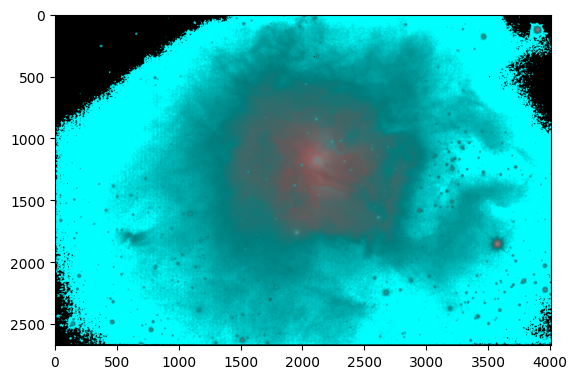

In [20]:
rgb_1 = make_lupton_rgb(b,r,g,minimum=2000, Q=100)
plt.imshow(rgb_1)

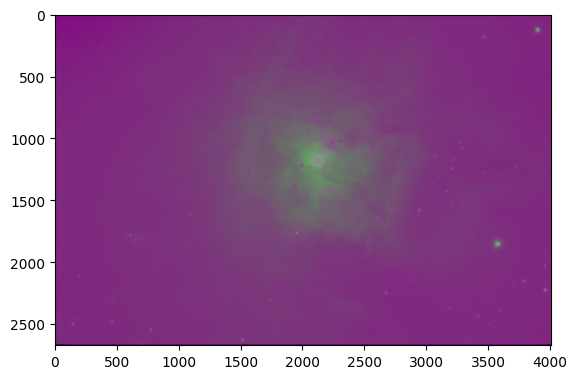

In [21]:
rgb_2 = make_lupton_rgb(r,b,g,minimum=1000, Q=70)
plt.imshow(rgb_2)

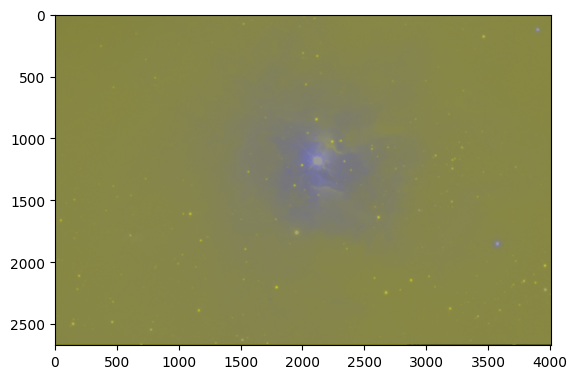

In [22]:
rgb_3 = make_lupton_rgb(g,r,b,minimum=500, Q=50)
plt.imshow(rgb_3)

C:\Users\Jamal\AppData\Local\Temp\ipykernel_8384\4201138904.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(data), cmap='plasma', origin='lower')
C:\Users\Jamal\AppData\Local\Temp\ipykernel_8384\4201138904.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(data), cmap='viridis',  origin='lower')
C:\Users\Jamal\AppData\Local\Temp\ipykernel_8384\4201138904.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(data), cmap='hot', origin='lower')
C:\Users\Jamal\AppData\Local\Temp\ipykernel_8384\4201138904.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(data), cmap='nipy_spectral',  origin='lower')


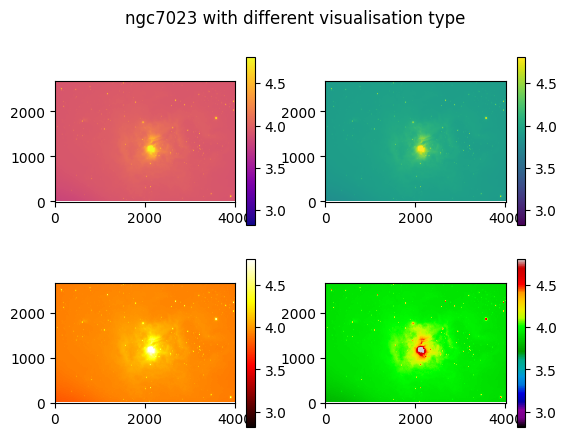

In [23]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

f4 = plt.figure()
f4.suptitle('ngc7023 with different visualisation type')

f4.add_subplot(2,2, 1)
plt.imshow(np.log10(data), cmap='plasma', origin='lower')
plt.colorbar()

f4.add_subplot(2,2, 2)
plt.imshow(np.log10(data), cmap='viridis',  origin='lower')
plt.colorbar()

f4.add_subplot(2,2,3)
plt.imshow(np.log10(data), cmap='hot', origin='lower')
plt.colorbar()

f4.add_subplot(2,2, 4)
plt.imshow(np.log10(data), cmap='nipy_spectral',  origin='lower')
plt.colorbar()

plt.show(block=True)